In [63]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [74]:
img = cv2.imread('./TestImages/bruno-mars-eyes.jpeg')
img.shape

(168, 300, 3)

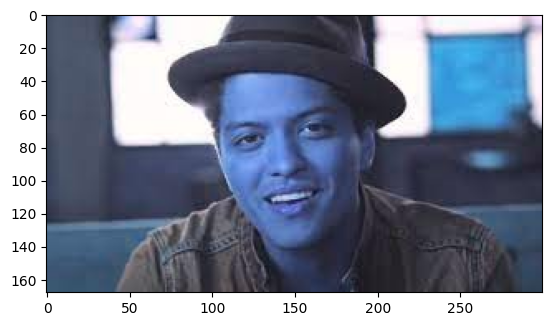

In [75]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

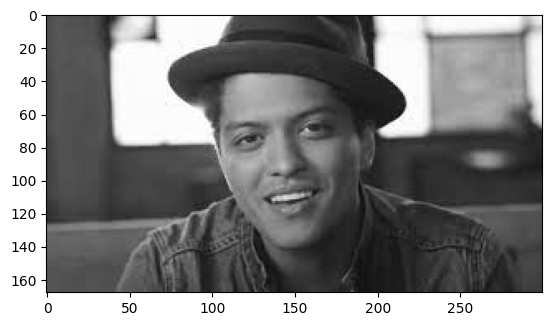

In [6]:
gray
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[95, 35, 97, 97]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(95, 35, 97, 97)

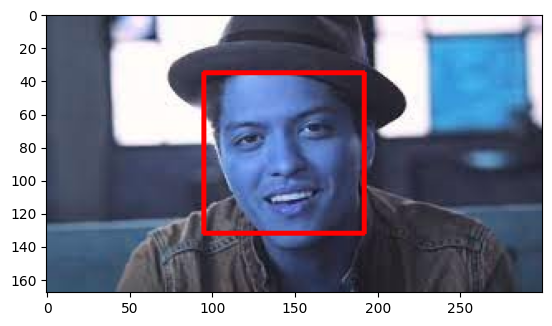

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

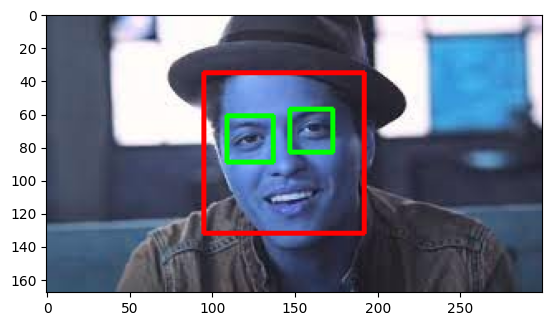

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

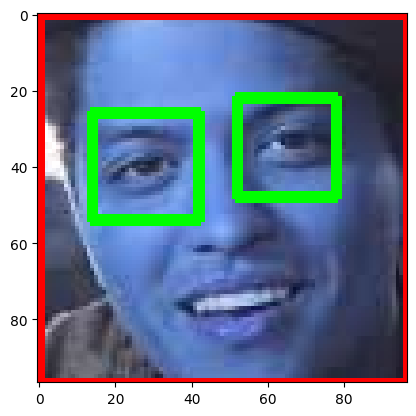

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

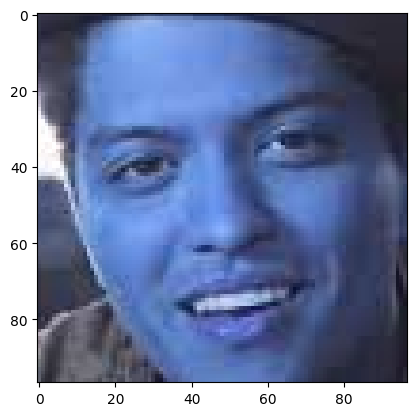

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./TestImages/bruno-mars-eyes.jpeg')
plt.imshow(cropped_image)

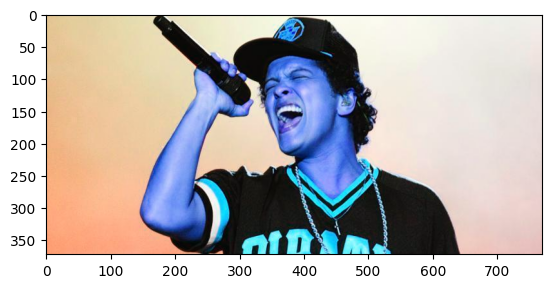

In [14]:
img_obstructed = cv2.imread('./TestImages/bruno-mars.jpg')
plt.imshow(img_obstructed)

In [15]:
cropped_img_no_2_eyes = get_cropped_image_if_2_eyes('./TestImages/bruno-mars.jpg')
cropped_img_no_2_eyes

<h5>Since cropped_img_no_2_eyes is None, this image should be disregarded and will not be included in the model training process.</h5>

<h2>Cropping and Saving Images</h2>

In [23]:
data_path = "./images_dataset/"
cropped_path = "./images_dataset/cropped/"

In [26]:
import os
img_dirs = [] 
for entry in os.scandir(data_path):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./images_dataset/maria_sharapova',
 './images_dataset/virat_kohli',
 './images_dataset/lionel_messi',
 './images_dataset/serena_williams',
 './images_dataset/roger_federer']

In [39]:
import shutil
if os.path.exists(cropped_path):
     shutil.rmtree(cropped_path)
os.mkdir(cropped_path)

In [81]:
cropped_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = cropped_path + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer


<h5>I had to deleted any unwanted images manually</h5>

<h2>Extracting meaningful features for image identification using wavelet transform</h2>

<h3>Feature extraction</h3> 